# CAPM prerequisite
* The market portfolio: a combination of all the possible investments in the world. The only risk is the systemetic risk
* The risk-free asset: The CAMP assumes the existence of a risk-free asset with a lower expected rate of return.
* Investors will allocate their money between the risk-free and the market portfolio
* The point where the Capital market line intersects the efficient frontier is the market portfolio

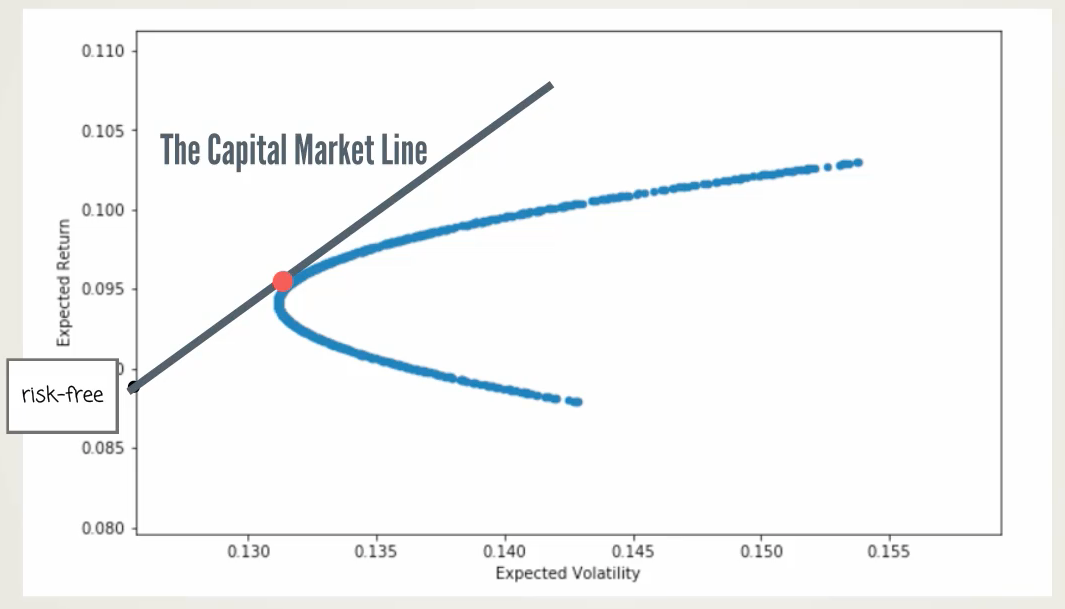

### Beta
* Beta helps us quantify the relationship between a security and the overall market portfolio. It measures the market risk that cannot be avoided through diversification.
* $\beta = \frac{Cov(rx,rm)}{\sigma m^2}$
* Cov(rx,rm): covariance between the stock and the market
* $\sigma m$: standard deviation of market
* stock that has a beta=0 means it has no relationship between the market. Stock that has a beta <1 means it is defensive. Stock that has a beta >1 means it is aggressive, risker than the market

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb

In [7]:
#on convention, use the 5 years data to calculate beta
tickers = ['PG','^GSPC']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t,data_source='yahoo', start='2012-1-1', end='2016-12-31')['Adj Close']

In [3]:
#calculate the beta 
#calculate the log return first
sec_returns = np.log(data/data.shift(1))

In [4]:
cov= sec_returns.cov()*250
cov

,PG,^GSPC
PG,0.020409,0.010078
^GSPC,0.010078,0.016362


In [9]:
#prepare the numerator
cov_with_market = cov.iloc[0,1]
cov_with_market

0.010078079344526474

In [10]:
#prepare the denominator
market_var = sec_returns['^GSPC'].var()*250
market_var

0.016361631002308474

In [8]:
#calculate the beta
PG_beta = cov_with_market/market_var
PG_beta

0.6159581121897046

Interpretation: PG's beta is less than 1, means it is a defensive stock.

# CAPM formula

$ri=rf+\beta im(rm-rf)$

A security's expected return = return of the risk-free asset + beta between the stock and the market * (expected return of the market - expected return of the risk-free asset)

* rm-rf = Equity risk premium

* In practice, the risk-free asset can be approximately the 10-year US government bond yield:2.5%

* Beta of the market portfolio with the S&P500 is about 0.62 (from previous calculation 0.615958)

* Historically, equity risk premium has been between 4.5% - 5.5%

* PG's CAPM model: r = 2.5%+0.62*5%=5.6%

In [11]:
#calculate the PG expected return using CAPM
PG_er = 0.025 + PG_beta *0.05
PG_er

0.055797905609485235

# Sharpe Ratio
To compare the portfolios in terms of returns and risk

Sharpe Ratio = $\frac{ri-rf}{\sigma i}$

rf = risk-free return

ri = rate of return of the stock i

$\sigma i$ = standard deviation of the stock i

In [12]:
#calculate the sharpe ratio of PG
sharpe = (PG_er - 0.025)/(sec_returns['PG'].std()*250**0.5)
sharpe

0.21558107107674226

# interpreting alpha
a measure of how good or bad an investment manager is doing.

$ri=\alpha + rf+\beta im(rm-rf)$

The standard CAPM setting assumes an alpha equal to 0. A good portfolio manager outperforms the market and earns a positive alpha. A poor portfolio manager underperforms the market and earns a negative or zero alpha.